In [1]:
import pandas as pd

input_file = '/Users/yzc/Desktop/EVC project/RI-Voting-Models/raw_data/survey_data.csv'

df = pd.read_csv(input_file)

# Keep only columns from Q1 onward
df = df.loc[:, 'Q1':]

# Drop the first row
df = df.iloc[1:].reset_index(drop=True)

# Fill missing values in all columns with "No Response"
df = df.fillna("No Response")

# If there is still an unwanted column named 'Unnamed: 22', drop it:
if 'Unnamed: 22' in df.columns:
    df = df.drop('Unnamed: 22', axis=1)


In [2]:
import matplotlib.pyplot as plt


# Define the expected order for Q19 responses (target variable)
q19_order = [
    "Definitely Not", 
    "Probably Not", 
    "I would need more information to make a decision", 
    "Probably", 
    "Definitely",
    "No Response"  # in case there are missing responses coded as "No Response"
]

def plot_stacked_bar(df, predictor, target='Q19', target_order=q19_order):
    """
    Plots a stacked bar chart showing the distribution of the target variable (Q19)
    for each category of the predictor variable.
    Filters out rows where the predictor value equals the predictor name (assumed to be the question title).
    """
    # Filter out rows where the predictor value equals the predictor column name (likely the question title)
    df_filtered = df[df[predictor] != predictor]
    
    # Group by predictor and count target responses
    data = df_filtered.groupby(predictor)[target].value_counts().unstack(fill_value=0)
    
    # Reindex columns to ensure the target categories are in the desired order
    data = data.reindex(columns=target_order, fill_value=0)
    
    # Sort the predictor categories alphabetically (or adjust if you know the natural order)
    data = data.sort_index()
    
    ax = data.plot(kind='bar', stacked=True, figsize=(10, 6))
    ax.set_title(f'Stacked Bar Chart of {target} by {predictor}')
    ax.set_xlabel(predictor)   
    ax.set_ylabel('Count')
    ax.legend(title=target, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.xticks(rotation=45, ha='right')
    plt.show()

# Define predictor groups (based on your clarification)
ordinal_predictors = ['Q2', 'Q7', 'Q8', 'Q10', 'Q11', 'Q13', 'Q14', 'Q15', 'Q16', 'Q20']
binary_predictors = ['Q4']
one_hot_predictors = ['Q1', 'Q3', 'Q6', 'Q9', 'Q12']

# --- Exploratory Analysis ---

**1. For ordinal predictors:**

Generating stacked bar charts for ordinal predictors...


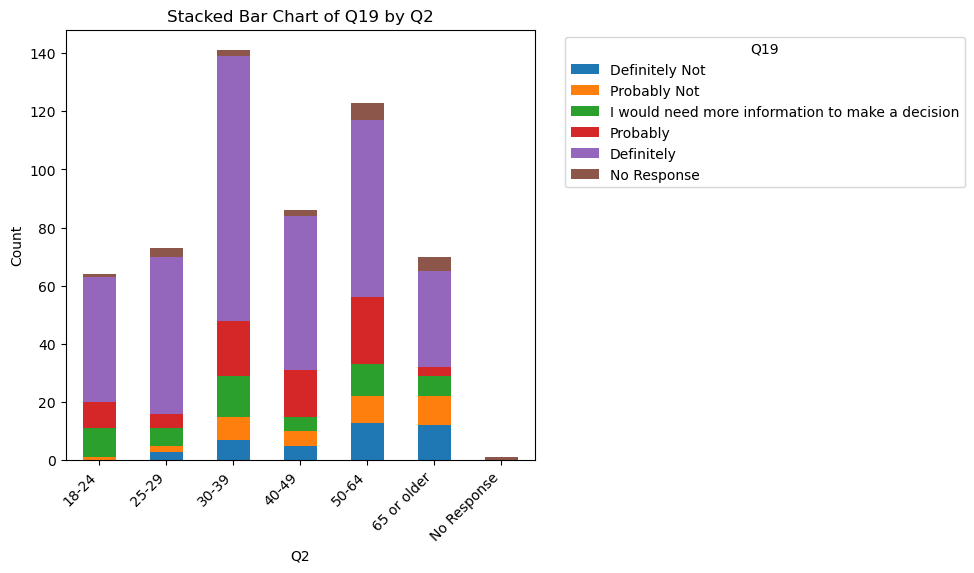

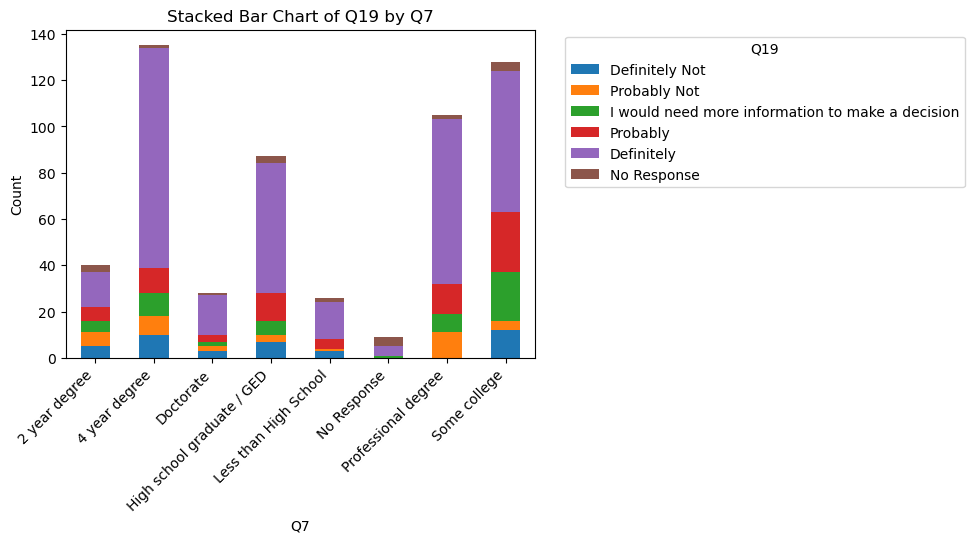

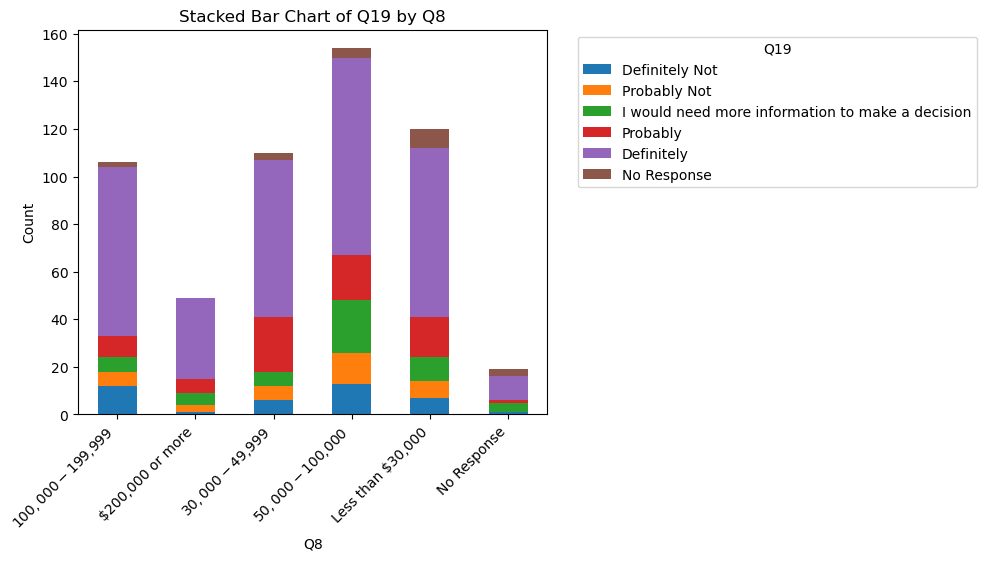

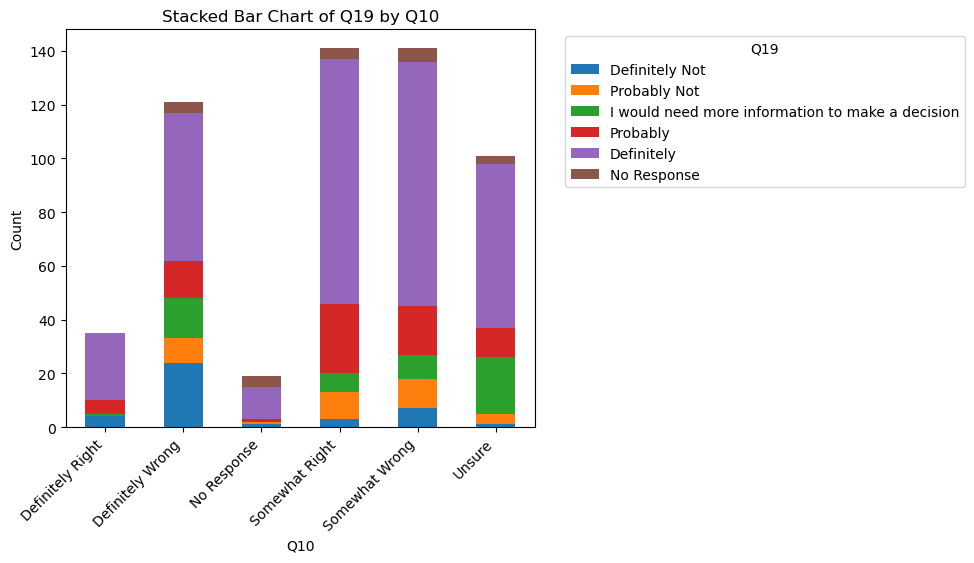

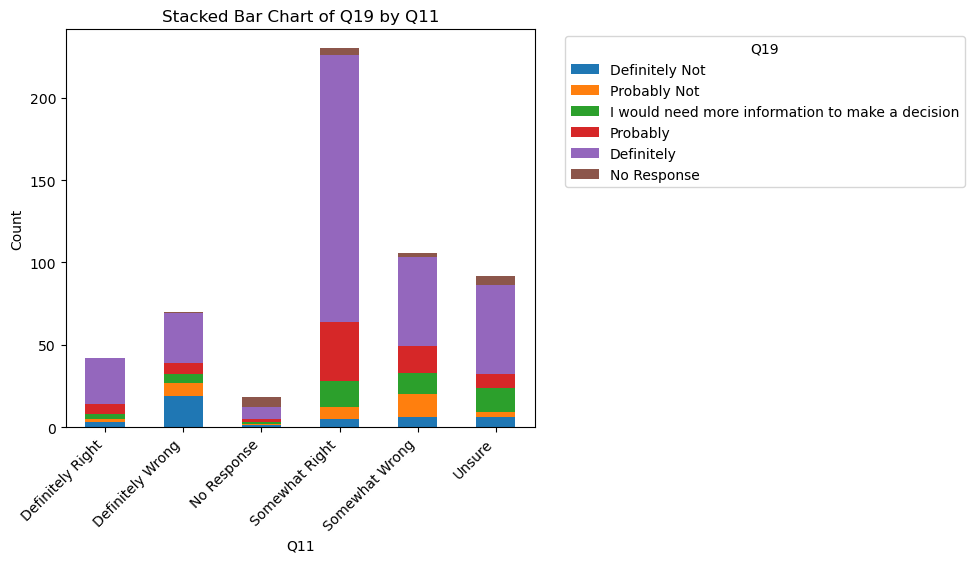

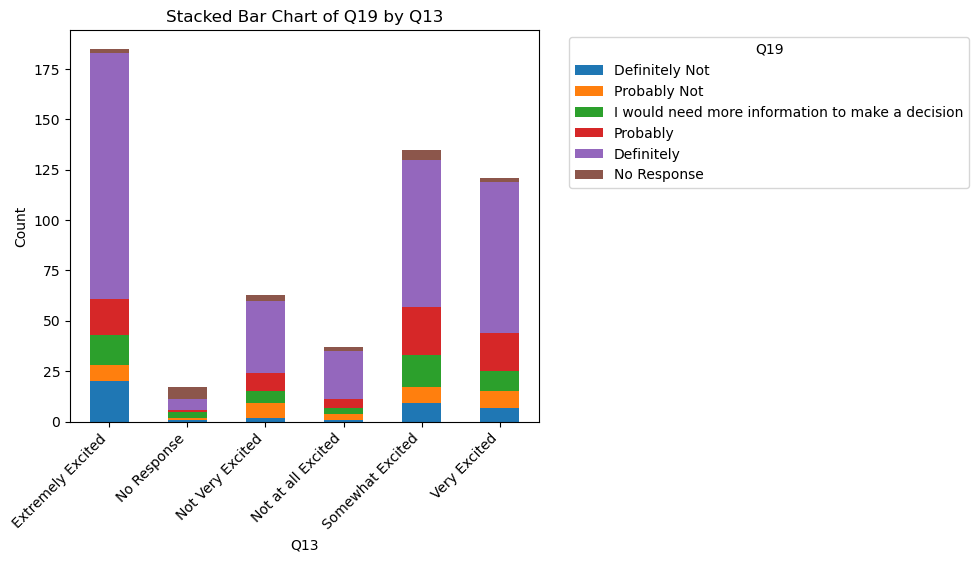

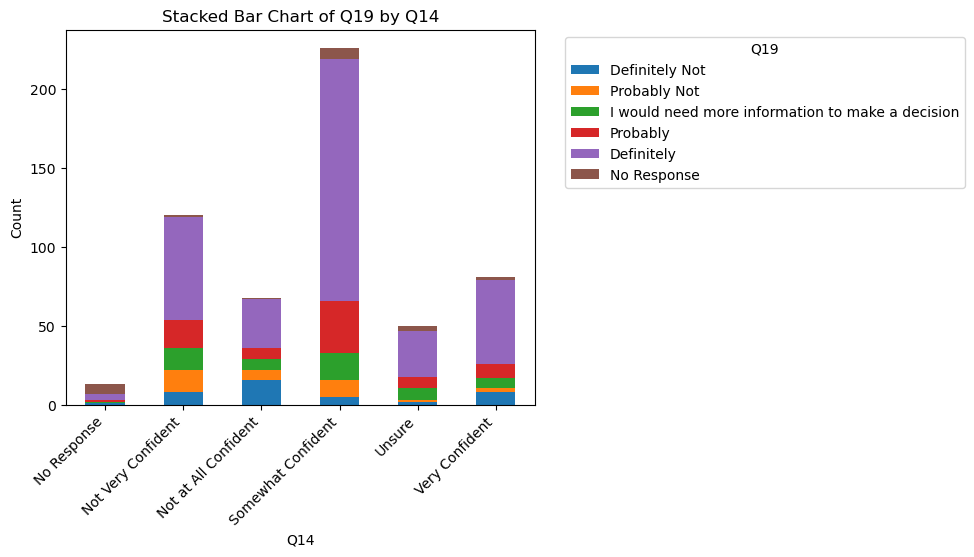

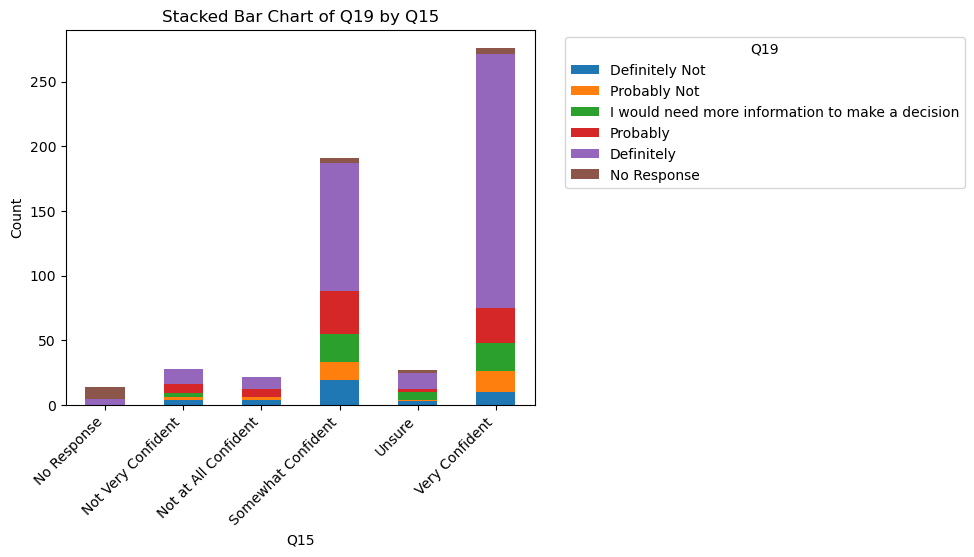

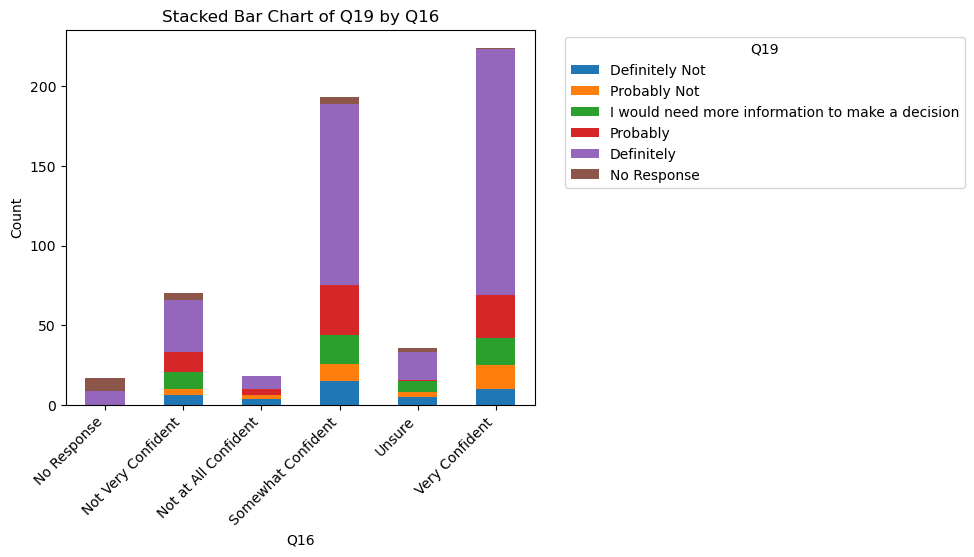

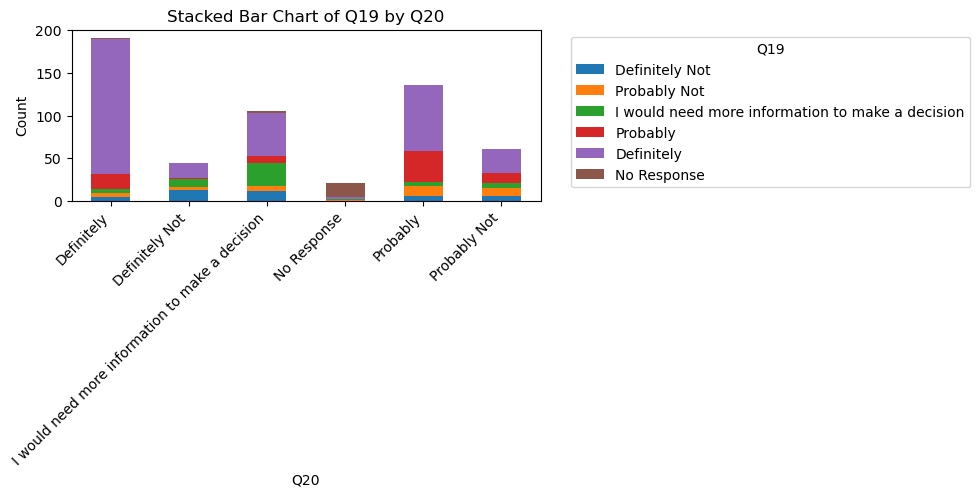

In [3]:
print("Generating stacked bar charts for ordinal predictors...")
for predictor in ordinal_predictors:
    plot_stacked_bar(df, predictor)

**2. For the binary predictor:**

Generating stacked bar charts for binary predictors...


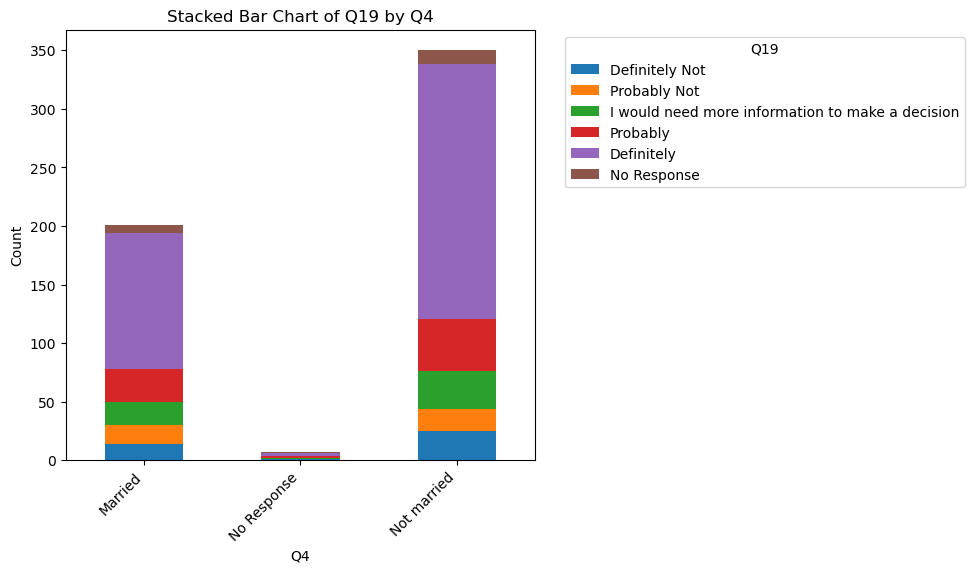

In [4]:
print("Generating stacked bar charts for binary predictors...")
for predictor in binary_predictors:
    plot_stacked_bar(df, predictor)

**3. For one-hot predictors:**

Generating stacked bar charts for one-hot predictors...


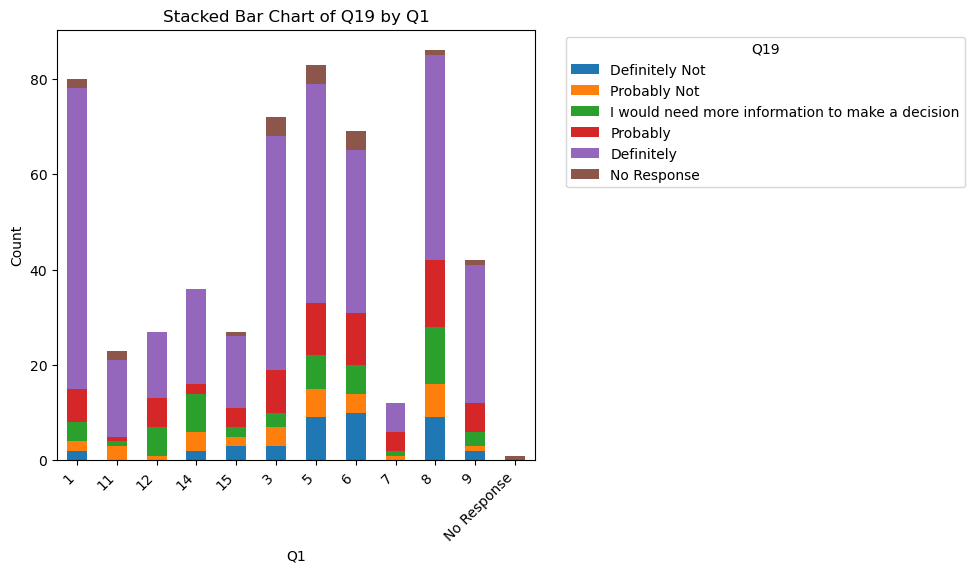

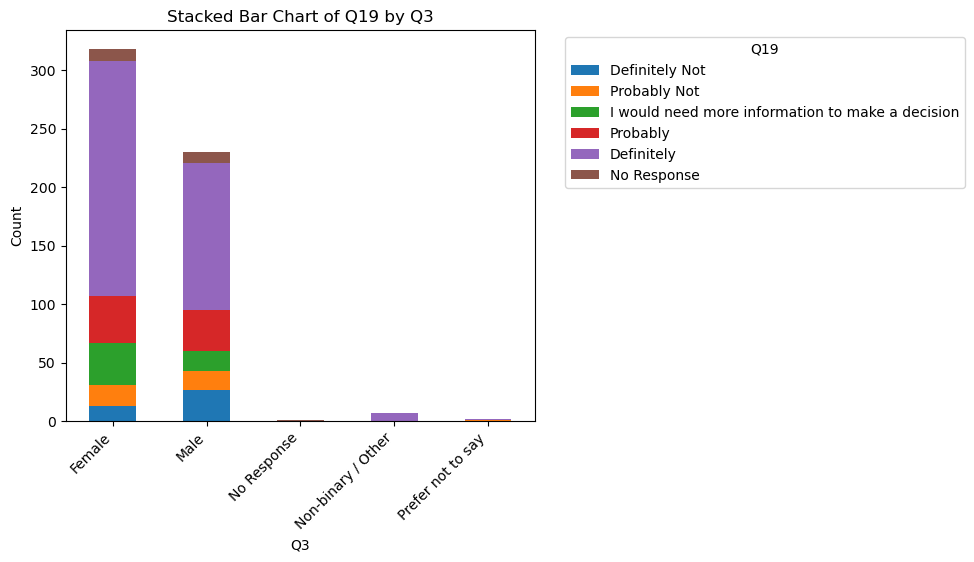

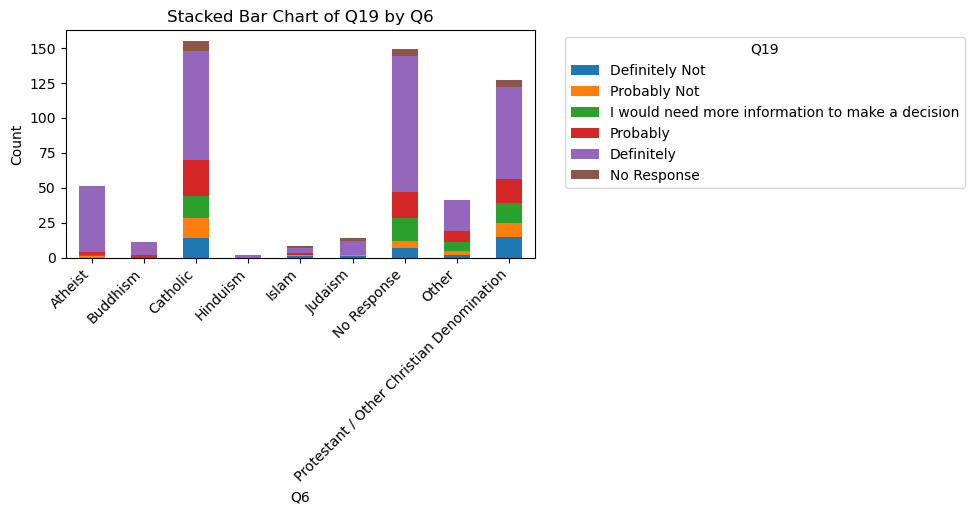

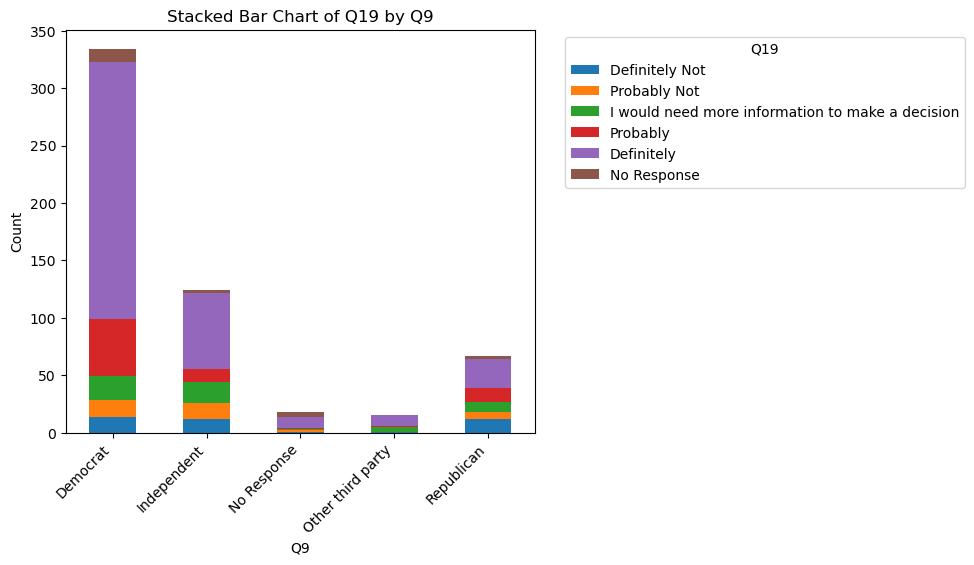

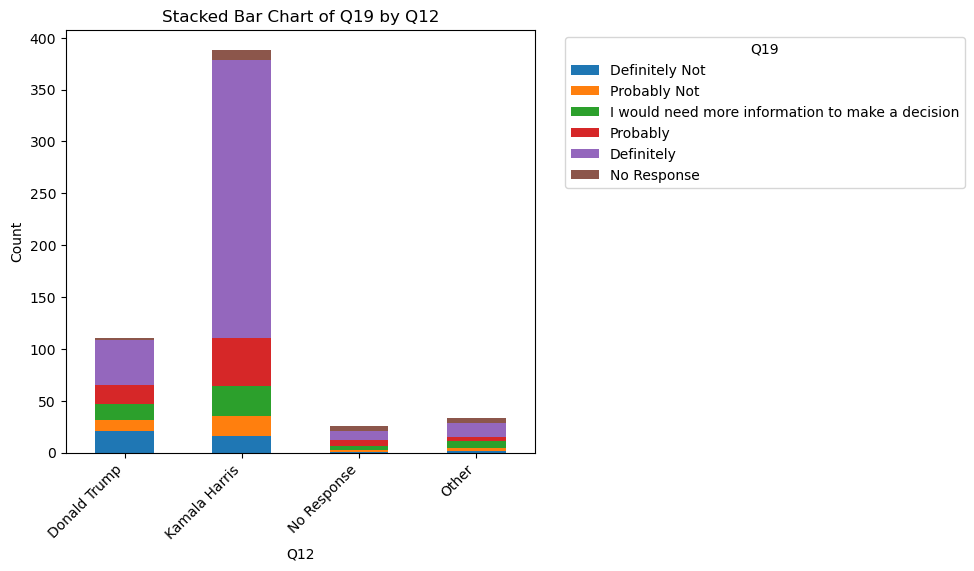

In [5]:
print("Generating stacked bar charts for one-hot predictors...")
for predictor in one_hot_predictors:
    plot_stacked_bar(df, predictor)

**4. For multi-hot predictors:**

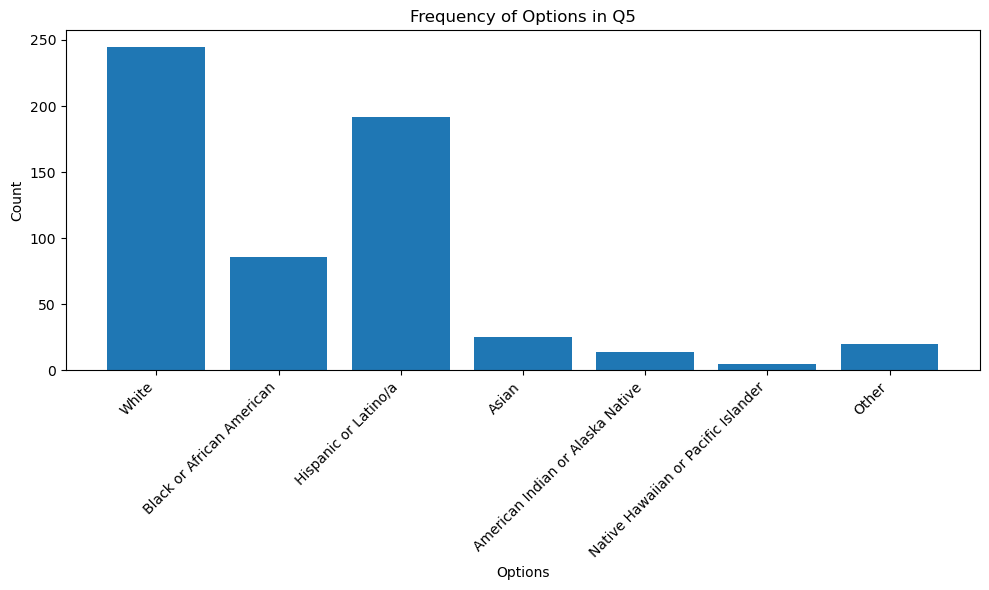

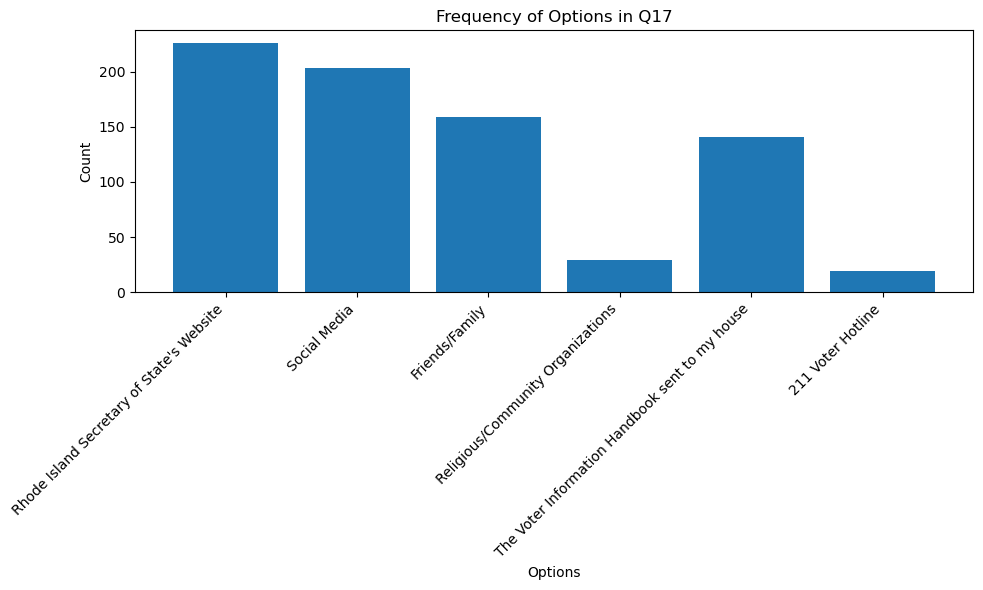

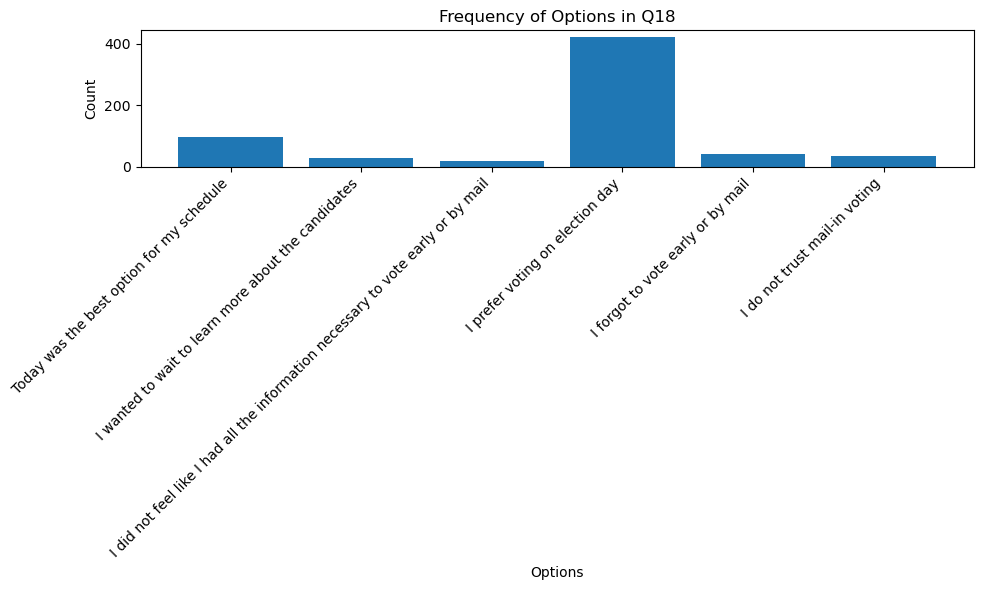

In [6]:
# For analysis of Q19 (target), we map its ordinal responses to numeric values.
registration_mapping = {
    "Definitely Not": 1,
    "Probably Not": 2,
    "I would need more information to make a decision": 3,
    "Probably": 4,
    "Definitely": 5,
    "No Response": 0
}

# Create a new numeric column for Q19
df['Q19_numeric'] = df['Q19'].map(registration_mapping)

# Define the multi-hot options for each multi-select question
multi_hot_options = {
    'Q5': [
    "White",
    "Black or African American",
    "Hispanic or Latino/a",
    "Asian",
    "American Indian or Alaska Native",
    "Native Hawaiian or Pacific Islander",
    "Other"
    ],
    'Q17': [
    "Rhode Island Secretary of State's Website",
    "Social Media",
    "Friends/Family",
    "Religious/Community Organizations",
    "The Voter Information Handbook sent to my house",
    "211 Voter Hotline"
    ],
    'Q18':[
    "Today was the best option for my schedule",
    "I wanted to wait to learn more about the candidates",
    "I did not feel like I had all the information necessary to vote early or by mail",
    "I prefer voting on election day",
    "I forgot to vote early or by mail",
    "I do not trust mail-in voting"
    ]
}

# -----------------------------------------------------
# 1. Frequency Plots for Each Multi-Hot Variable
# -----------------------------------------------------
for var, options in multi_hot_options.items():
    counts = {}
    for option in options:
        # Cast each cell to string to ensure that we can search for the option
        count = df[var].apply(lambda x: option in str(x)).sum()
        counts[option] = count
    # Plot a bar chart for frequency counts of each option
    plt.figure(figsize=(10, 6))
    plt.bar(counts.keys(), counts.values())
    plt.title(f'Frequency of Options in {var}')
    plt.xlabel('Options')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

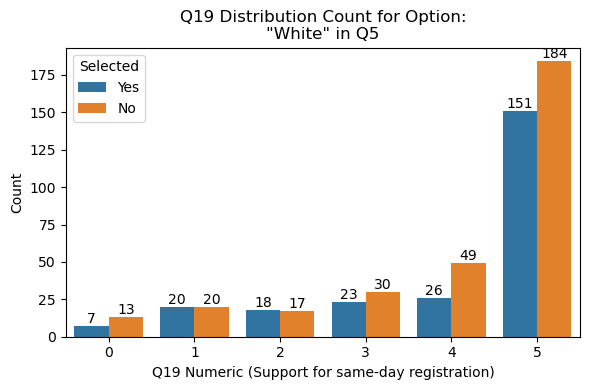

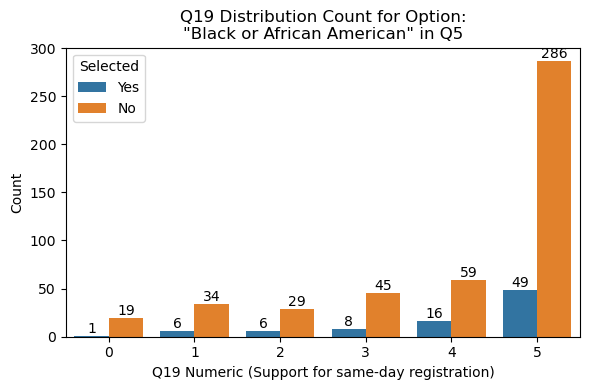

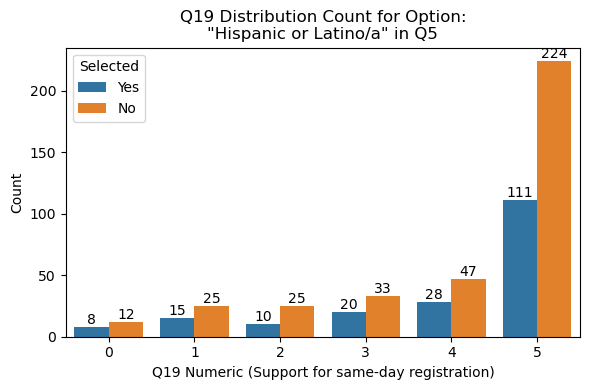

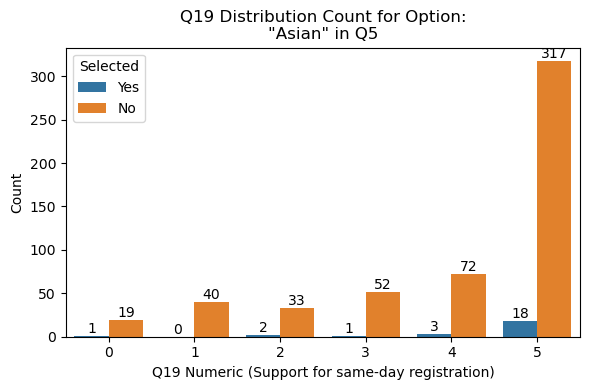

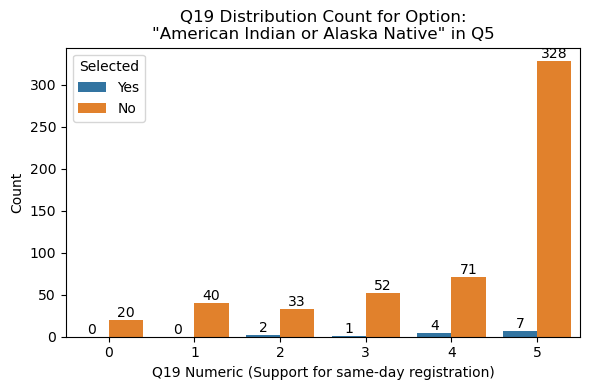

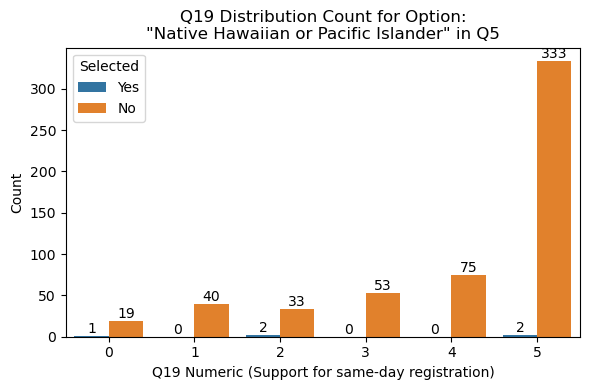

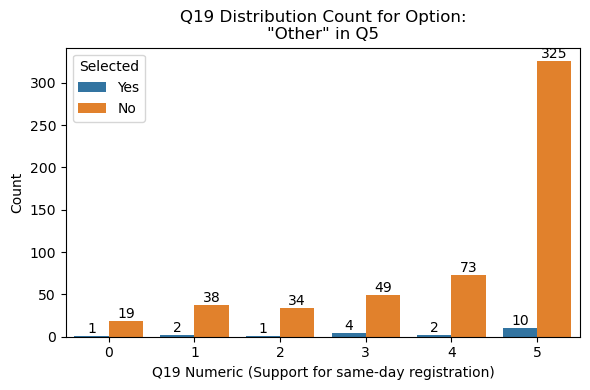

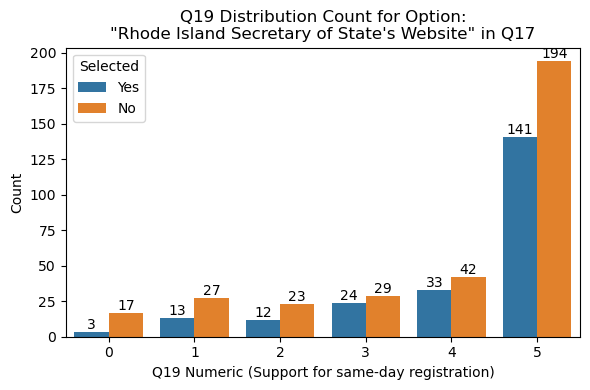

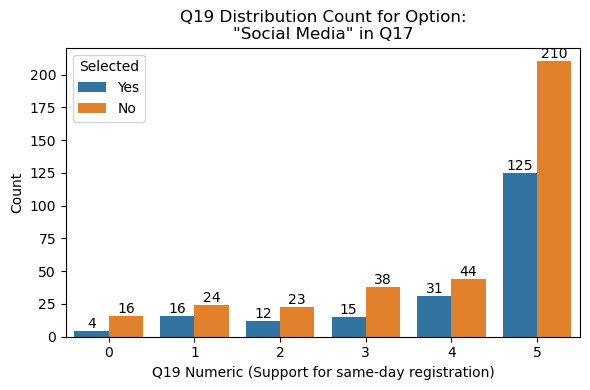

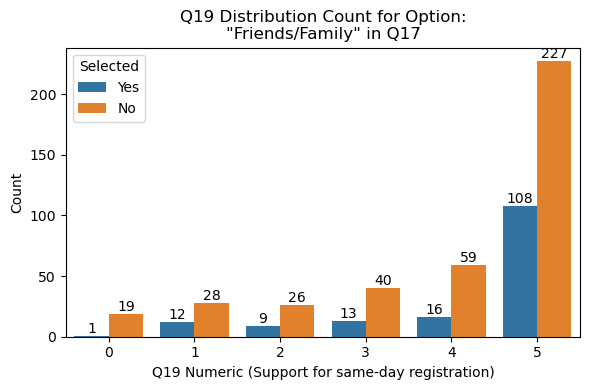

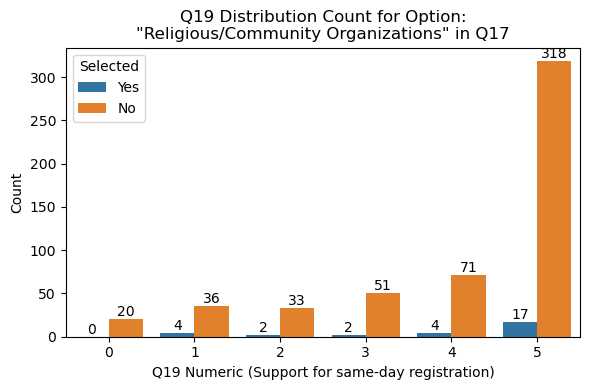

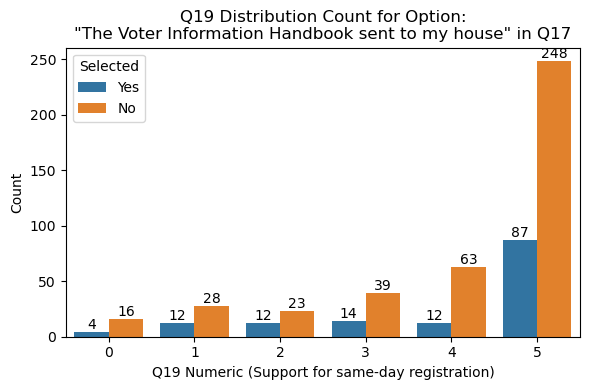

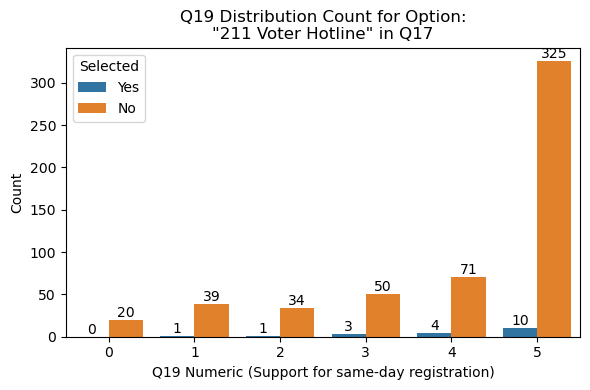

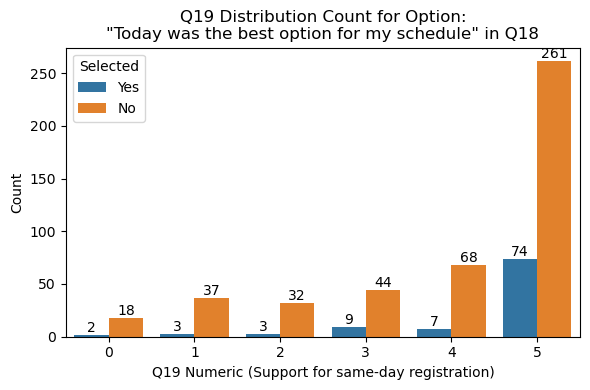

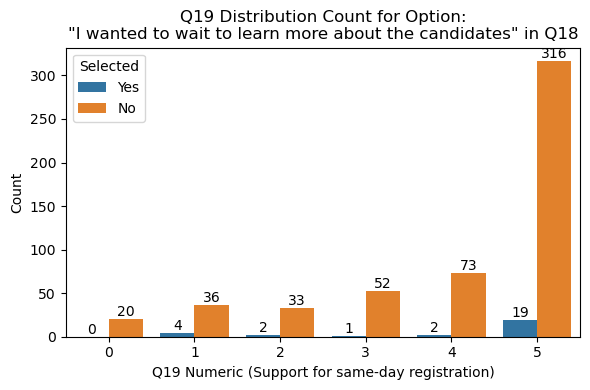

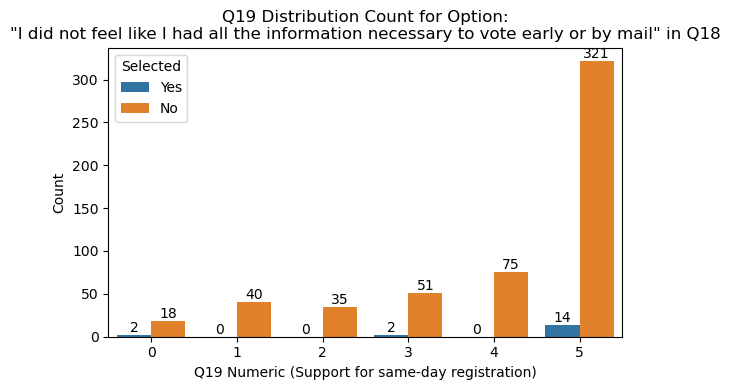

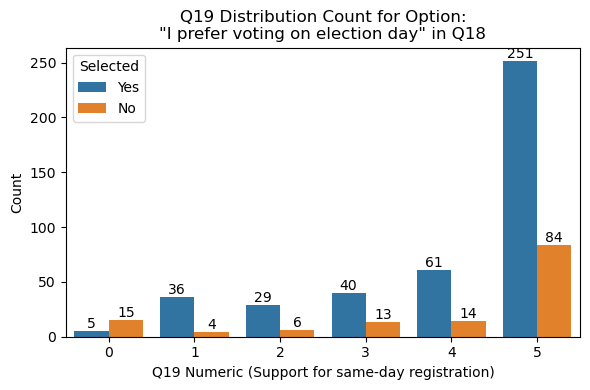

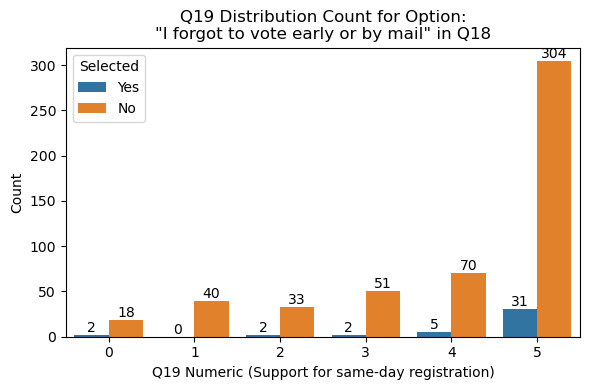

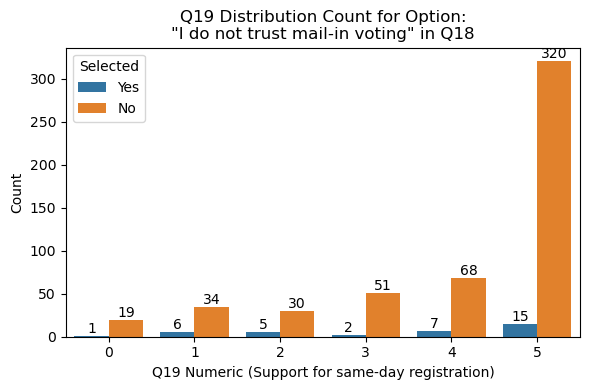

In [7]:
# -----------------------------------------------------
# 2. Box Plots for Q19 Distribution by Each Option
# -----------------------------------------------------
import seaborn as sns

for var, options in multi_hot_options.items():
    for option in options:
        # Create a boolean mask for respondents who selected the option
        mask = df[var].apply(lambda x: option in str(x))
        selected = df.loc[mask, 'Q19_numeric']
        not_selected = df.loc[~mask, 'Q19_numeric']
        
        # Only plot if there are responses for the option
        if not selected.empty:
            df_plot = pd.DataFrame({
                'Selected': ['Yes'] * len(selected) + ['No'] * len(not_selected),
                'Q19_numeric': pd.concat([selected, not_selected])
            })
            
            plt.figure(figsize=(6, 4))
            ax = sns.countplot(data=df_plot, x='Q19_numeric', hue='Selected')
            ax.set_title(f'Q19 Distribution Count for Option:\n"{option}" in {var}')
            ax.set_xlabel('Q19 Numeric (Support for same-day registration)')
            ax.set_ylabel('Count')
            
            # Display the count on top of each bar
            for container in ax.containers:
                ax.bar_label(container, label_type='edge')
            
            plt.tight_layout()
            plt.show()